# Nueral Network-
* A neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain. Neural networks are made up of interconnected nodes, called neurons, which process information and send signals to each other.

* To pass messages to the brain the neurons pass the message. messages are passed with nuerons. through the nuerions info passes back and forth through forward or bacward propogation until the the objective is achieved

* it can be used for any kind of data and for complex calculation and processing, with the help of deep learning this is possible.

# AI
* is to mimick human brain into a computer


#images

* pixcels will process one by one each in the nueral network, to the final result, the job of the hidden layers is to pass the info to the next section.

#example
* nose- to nueron - to brain - cover nose

Artificial nueral network vs nueral network


Churn- the rate of customers stop doing bussiness with a company



situation: a bank is facing customer churn , they want to analyze this and find the reason why customers are leaving.

Steps

* understand the data/ import your data

#part one - preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/Churn_Modelling.csv"

df= pd.read_csv(path)
df

#0 is stay
#1 is leave

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:

df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#EDA
#findings on basis of exit column
#tenure(how long you been with the bank) is import
#geography
#balance if you keep a good balance then you are loyal
#number of products, is like many loans or creditrcsards borrowed from the bank
#if salary is high you might stay with the bank
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

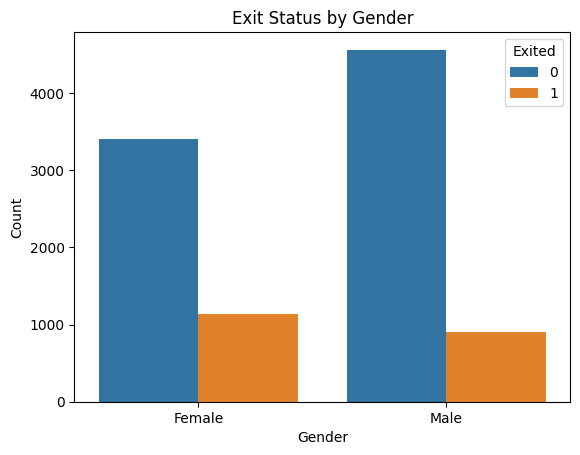

In [ ]:
#female customers are more loyal than male customers

#.size() calculates the size (i.e., the count) of each group
# reset_index(name="Count"), This part of the code resets the index and names the newly created count column as "Count."
exited_counts = df.groupby(["Exited", "Gender"]).size().reset_index(name="Count")

# Create a bar plot
sns.barplot(x="Gender", y="Count", hue="Exited", data=exited_counts)

# Add labels and a title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Exit Status by Gender")

# Show the plot
plt.show()


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#if credit score is low, person might leave the bank , high creditscore person will stay with the bank

poor= df[df["CreditScore"]<=579].size
fair= df[(df["CreditScore"] >= 580) & (df["CreditScore"] <= 669)].size
good= df[(df["CreditScore"] >= 670) & (df["CreditScore"] <= 739)].size
very_good= df[(df["CreditScore"] >= 740) & (df["CreditScore"] <= 799)].size
exceptional= df[(df["CreditScore"] >= 800) & (df["CreditScore"] <= 850)].size


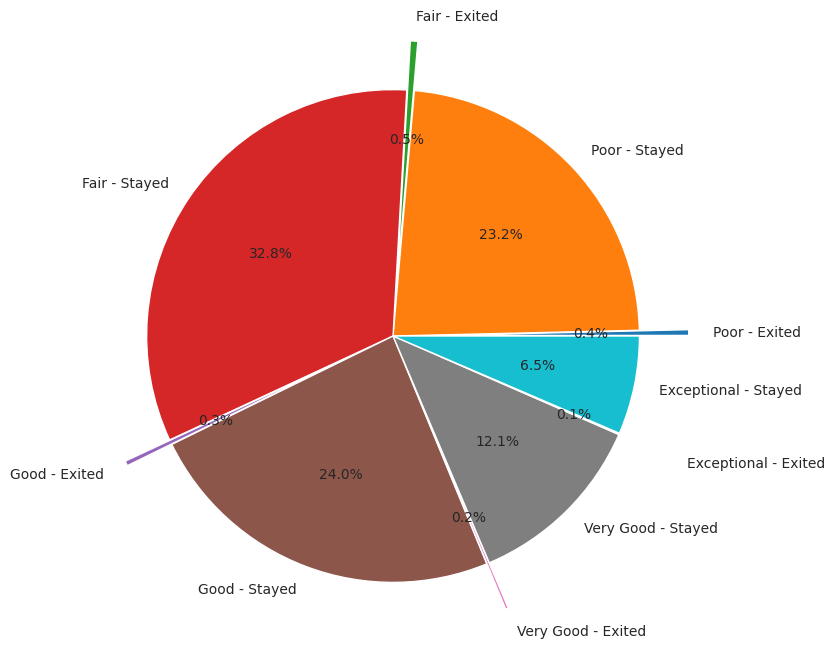

In [ ]:
# Calculate the count of people who exited and stayed for each credit score range
poor_exited = df[(df["CreditScore"] <= 579) & (df["Exited"] == 1)].shape[0]
poor_stayed = poor - poor_exited

fair_exited = df[(df["CreditScore"] >= 580) & (df["CreditScore"] <= 669) & (df["Exited"] == 1)].shape[0]
fair_stayed = fair - fair_exited

good_exited = df[(df["CreditScore"] >= 670) & (df["CreditScore"] <= 739) & (df["Exited"] == 1)].shape[0]
good_stayed = good - good_exited

very_good_exited = df[(df["CreditScore"] >= 740) & (df["CreditScore"] <= 799) & (df["Exited"] == 1)].shape[0]
very_good_stayed = very_good - very_good_exited

exceptional_exited = df[(df["CreditScore"] >= 800) & (df["CreditScore"] <= 850) & (df["Exited"] == 1)].shape[0]
exceptional_stayed = exceptional - exceptional_exited

data = [poor_exited, poor_stayed, fair_exited, fair_stayed, good_exited, good_stayed, very_good_exited, very_good_stayed, exceptional_exited, exceptional_stayed]
labels = ['Poor - Exited', 'Poor - Stayed', 'Fair - Exited', 'Fair - Stayed', 'Good - Exited', 'Good - Stayed', 'Very Good - Exited', 'Very Good - Stayed', 'Exceptional - Exited', 'Exceptional - Stayed']
explode = [0.2, 0, 0.2, 0, 0.2,0,0.2,0,0.2,0]
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(8, 8)) # Set figure size
plt.pie(data, labels=labels, autopct='%1.1f%%', explode=explode) # Create pie chart with percentage labels
plt.show() # Show chart


In [ ]:
#age- young age customers are more prone to switch banks

df.groupby(["Age"])["Exited"].value_counts()

Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64

# Neural Network Weights

https://deeplizard.com/lesson/ddd2drizla#:~:text=An%20artificial%20neural%20network%20is,to%20each%20other%20via%20weights.&text=Each%20weight%20represents%20the%20strength,the%20two%20nodes%20it%20connects.
In a neural network, a weight is a parameter that transforms input data within the network's hidden layers.
 Weights represent the strength of the connection between two nodes.
 When input enters a node, it's multiplied by a weight value. The resulting output is either observed, or passed to the next layer in the neural network.

The weight values are first randomly initialized and then learned, updated, and optimized by the network during the training process.

For each node in a fully connected layer, a weighted sum is computed with each of the incoming weights. This weighted sum is considered the pre-activation output from the node.

 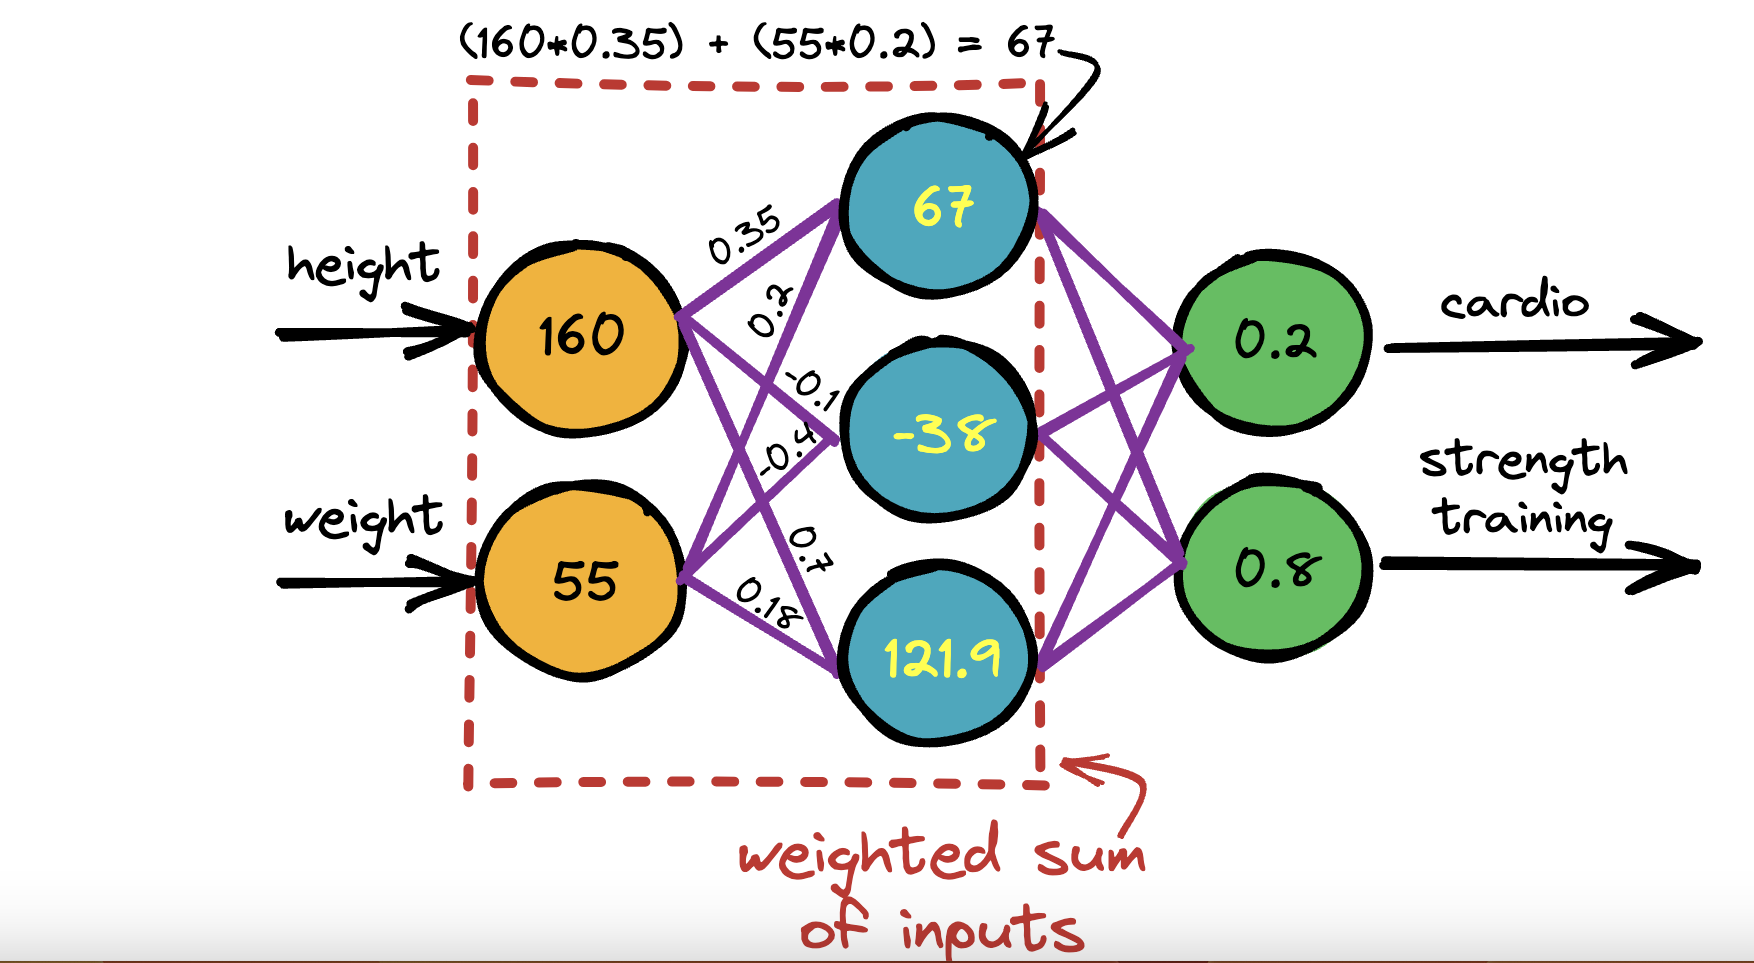


We are inserting all 10 independent variablres (input)  from the churn modeling datasetinto the nueral network, to see why these customers have exixted. which is the dependent varible exited and that is the (output)

There are three hidden layers, they are strongly connected network. there are 56 nuerons in the complete network. and depending on how the network is fitted  is you can change the hidden layers

fully connected dense neytwork , all 10 nuerons are connected with 15 layer nuerons to give the output. when you are connecting the nuerons there is weight associated with it. an example is tyhe creditscore, when creditscore connects with the first nueron of the hidden layer, some weight will be attached to that. at every nueron there will be an associated weight attached to it.

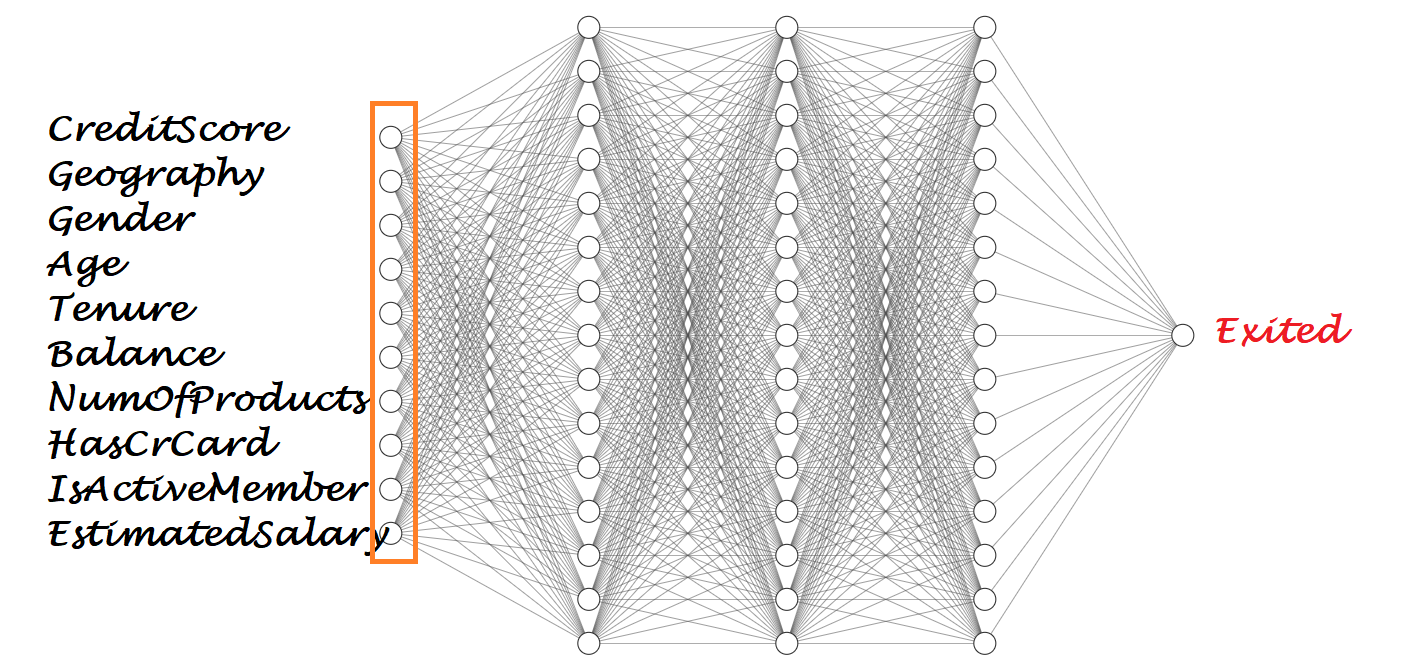

# choosing independevent and dependent values

In [ ]:
#look for import columns and depenbdent columns, you must look for coulmns that are responsible for customer churn
X= df.iloc[:, 3:-1].values
X

y= df.iloc[:, -1:].values

y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

# Categorial Data- Gender - Label encorder
* applying the label encoder on the gender column

In [ ]:
#the gender hass been changed into 0s and 1s
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
X[:, 2]= le.fit_transform(X[:, 2])
X[:, 2]



array([0, 0, 0, ..., 0, 1, 0], dtype=object)

# Categorial Data- Geography - onehotencorder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1] )], remainder="passthrough")
X= np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

# Train and Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state= 0 )

# Feature Selection

* scaling all data so that they are matching in scale


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Part 2 : Artificial Neural Network

In [ ]:
import tensorflow as tf
#tensorflow is used for data vizualisation , it was developed by google and facebook has one that is called pytorch

In [ ]:
tf.__version__ # we are looking at the version because you should know how to see the version and if needed to use the version you need

'2.13.0'

# Building ANN(*Artificial Neural Network*):



# Initializing ANN(*Artificial Neural Network*)

In [ ]:
ann=tf.keras.models.Sequential() #for Initialization this is required
#creates a new sequential model object.
#A sequential model is a type of neural network model where the layers are stacked on top of each other,
# with the output of one layer being the input to the next layer.

#kera is a wraper on tensor flow

# Adding the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #what are you adding to the hiden netwrk
#units 6 is the number of nuerons in the layer

#relu is the activation function, on the nueron level it is being applied, it goes from 1-0 or 0-1

# Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the third hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#this is the output layer

# Compile ANN(Artificial Neural Network)

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#The model is compiled with the 'adam' optimizer,
#'binary_crossentropy' loss function (common for binary classification), and accuracy as the evaluation metric.
#optimizer = 'adam': The optimizer specifies how the model will update its parameters during training.  It is an adaptive learning rate optimizer, which means that it can adjust the learning rate for each parameter individually.


# Training the ANN on the training data

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=15)
#train the ann , the traininf data is X_train, y_train ,
#batch size is 32 rows at a time , epochs you have to forward and baward propogate this many times
# we are increasing the number of trainings , then the more accurancy you will have

# batch_size: The batch size is the number of training examples that are fed to the model at a time during training.
# epochs: The number of epochs is the number of times that the model will train on the entire training dataset.


# Epoch 1/15: This indicates that this is the first epoch of the training process.
# 250/250: This indicates that the model has been trained on all 250 training examples.
# The loss is a measure of how well the model is able to predict the correct labels for the training data.
# The accuracy is a measure of how many of the training examples the model was able to predict correctly.

# The output shows that the loss and accuracy of the model are improving over time.
# This indicates that the model is learning to predict the correct labels for the training data.

Epoch 1/15
250/250 [==============================] - 3s 3ms/step - loss: 0.5458 - accuracy: 0.7960
Epoch 2/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.7960
Epoch 3/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.7960
Epoch 4/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7960
Epoch 5/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7960
Epoch 6/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.7960
Epoch 7/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.7960
Epoch 8/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.7960
Epoch 9/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.7960
Epoch 10/15
250/250 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.7960

In [ ]:


new_customer_features = {
    'CreditScore': 748,
    'Geography': "Germany",
    'Gender': 0,
    'Age': 42,
    'Tenure': 3,
    'Geography': "Germany",
    'Balance': 5000,
    'NumOfProducts': 1,
    'HasCrCard': 0,
    'IsActiveMember': 0,
    'EstimatedSalary': 79000

}

new_customer_data = pd.DataFrame([new_customer_features])


In [ ]:
new_customer_features = new_customer_data.iloc[:, 3:].values  # Extract features
new_customer_features[:, 2] = le.transform(new_customer_features[:, 2])  # Label encoding
new_customer_features = ct.transform(new_customer_features)  # One-hot encoding
new_customer_features = sc.transform(new_customer_features)  # Feature scaling


In [ ]:
churn_probability = ann.predict(new_customer_features)
